#### I. Data Inspection, Cleaning
1. Inspect Data
2. Divide into X feature and y target DataFrames
3. Handle N/A, NaN Values: eg. fillna() or SimpleImputer() to fill or remove NA values.

#### II. Exploratory Data Analysis (EDA)
Understand your **target variable**: continuous (regression) categorical (classification).
**Visualize relationships**: determine how features relate to target variable (scatter plots, histograms, and boxplots)
Check **feature distributions**: determine if transformations are needed (e.g., log transformation for skewed data)
**Correlation analysis**: identify highly correlated features, which can impact certain models.

1. Compute Correlation Matrix () (before scaling to keep original values intact for more accurate correlation matrix).
2. Feature Importance (with Random Forest Model) (seaborn, matplotlib for visualization)


#### III. Data Preparation, Split and Scale 
1. Train-Test Split (prepare data for model training and evaluation).
2. Standard Scaling (ensure your features are on the same scale): StandardScaler()

#### IV. Modeling
1. Model (create model)
2. Fit (train model)
3. Evaluate Training Model fit (accuracy_score/score on training data)
4. Predict (accuracy_score/score)
5. Evaluate Model (accuracy_score/score on y test data (actual data)  vs. predictions)

#### V. Optimization / Hyperparameter Tuning

1. Grid Search
GridSearchCV helps to determine the combination of hyperparameters that give the best performance (based on the scoring metric you choose)

#### VI. Re-Model / Evaluate with Optimized Params/Methods/Hyperparameters

In [1]:
import pandas as pd
# Set display options
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

import pickle

In [2]:
pkl_path = "../final_artifacts/merge_cfb_ref_pfb_ref_output.pkl"

with open(pkl_path, 'rb') as f:
    df = pickle.load(f)

display(f'rows : {len(df)}; cols: {len(df.columns)}')

display(len(df))

x=10
display(df.iloc[:,:x].head())
display(df.iloc[:,x:].head())

'rows : 540; cols: 27'

540

,player,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%
0,Greg Cook,29,332,655,50.7,4906,34,5.2,35,5.3
1,Marty Domres,27,368,702,52.4,4492,24,3.4,38,5.4
2,Terry Hanratty,29,304,550,55.3,4152,27,4.9,34,6.2
3,Bobby Douglass,30,183,379,48.3,2817,20,5.3,20,5.3
4,Al Woodall,20,118,221,53.4,1501,4,1.8,13,5.9


,Y/A,AY/A,Y/C,Y/G,Rate,ht_in,wt,college,draft_yr,round,pick,nfl_success,win_success,stats_success,metrics_success,longevity_success,superbowl_success
0,7.5,6.12,14.8,169.2,120.0,76.0,220.0,Cincinnati,1969,1,5,0,0,0,0,0,0
1,6.4,4.65,12.2,166.4,106.6,76.0,220.0,Columbia,1969,1,9,0,0,0,0,1,0
2,7.5,5.75,13.7,143.2,122.5,73.0,210.0,Notre Dame,1969,2,30,0,0,0,0,0,1
3,7.4,6.11,15.4,93.9,117.6,76.0,225.0,Kansas,1969,2,41,0,0,0,0,1,0
4,6.8,4.51,12.7,75.1,104.7,77.0,205.0,Duke,1969,2,52,0,0,0,0,0,0


#### I. Data Inspection, Cleaning - 1. Inspect Data

In [3]:
# display(df.info())
x=17
display(df.iloc[:,:x].head())
display(df.iloc[:,x:].head())
display(df.columns)

filtered_df = df.iloc[:,:21]
filtered_df.head()
cols_to_drop =  ['player', 'college', 'draft_yr']
filtered_df.drop(columns=cols_to_drop, inplace=True)

display(filtered_df.head())
# display(filtered_df.iloc[:,:x].head())
# display(filtered_df.iloc[:,x:].head())
display(filtered_df.columns)

,player,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Y/A,AY/A,Y/C,Y/G,Rate,ht_in,wt
0,Greg Cook,29,332,655,50.7,4906,34,5.2,35,5.3,7.5,6.12,14.8,169.2,120.0,76.0,220.0
1,Marty Domres,27,368,702,52.4,4492,24,3.4,38,5.4,6.4,4.65,12.2,166.4,106.6,76.0,220.0
2,Terry Hanratty,29,304,550,55.3,4152,27,4.9,34,6.2,7.5,5.75,13.7,143.2,122.5,73.0,210.0
3,Bobby Douglass,30,183,379,48.3,2817,20,5.3,20,5.3,7.4,6.11,15.4,93.9,117.6,76.0,225.0
4,Al Woodall,20,118,221,53.4,1501,4,1.8,13,5.9,6.8,4.51,12.7,75.1,104.7,77.0,205.0


,college,draft_yr,round,pick,nfl_success,win_success,stats_success,metrics_success,longevity_success,superbowl_success
0,Cincinnati,1969,1,5,0,0,0,0,0,0
1,Columbia,1969,1,9,0,0,0,0,1,0
2,Notre Dame,1969,2,30,0,0,0,0,0,1
3,Kansas,1969,2,41,0,0,0,0,1,0
4,Duke,1969,2,52,0,0,0,0,0,0


Index(['player', 'G', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%',
       'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'ht_in', 'wt', 'college',
       'draft_yr', 'round', 'pick', 'nfl_success', 'win_success',
       'stats_success', 'metrics_success', 'longevity_success',
       'superbowl_success'],
      dtype='object')

,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Y/A,AY/A,Y/C,Y/G,Rate,ht_in,wt,round,pick
0,29,332,655,50.7,4906,34,5.2,35,5.3,7.5,6.12,14.8,169.2,120.0,76.0,220.0,1,5
1,27,368,702,52.4,4492,24,3.4,38,5.4,6.4,4.65,12.2,166.4,106.6,76.0,220.0,1,9
2,29,304,550,55.3,4152,27,4.9,34,6.2,7.5,5.75,13.7,143.2,122.5,73.0,210.0,2,30
3,30,183,379,48.3,2817,20,5.3,20,5.3,7.4,6.11,15.4,93.9,117.6,76.0,225.0,2,41
4,20,118,221,53.4,1501,4,1.8,13,5.9,6.8,4.51,12.7,75.1,104.7,77.0,205.0,2,52


Index(['G', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Rate', 'ht_in', 'wt', 'round', 'pick'],
      dtype='object')

In [4]:
# Check balance of the y/target data.
df['nfl_success'].value_counts()

0    383
1    157
Name: nfl_success, dtype: int64

#### I. Data Inspection, Cleaning - 2. Divide into X feature and y target DataFrames

In [5]:
# Set X feature data to be the College Football statistical data 
# Set the aggregate nfl_success to be the y target data

y = df['nfl_success']
X = filtered_df
X.columns

Index(['G', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Rate', 'ht_in', 'wt', 'round', 'pick'],
      dtype='object')

In [6]:
# Filter DataFrame to columns of interest.

df[['G', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Rate', 'ht_in', 'wt', 'round', 'pick',
       'nfl_success'
       ]].head()

,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Y/A,AY/A,Y/C,Y/G,Rate,ht_in,wt,round,pick,nfl_success
0,29,332,655,50.7,4906,34,5.2,35,5.3,7.5,6.12,14.8,169.2,120.0,76.0,220.0,1,5,0
1,27,368,702,52.4,4492,24,3.4,38,5.4,6.4,4.65,12.2,166.4,106.6,76.0,220.0,1,9,0
2,29,304,550,55.3,4152,27,4.9,34,6.2,7.5,5.75,13.7,143.2,122.5,73.0,210.0,2,30,0
3,30,183,379,48.3,2817,20,5.3,20,5.3,7.4,6.11,15.4,93.9,117.6,76.0,225.0,2,41,0
4,20,118,221,53.4,1501,4,1.8,13,5.9,6.8,4.51,12.7,75.1,104.7,77.0,205.0,2,52,0


In [7]:
# Investigate non-number/NaN counts

nan_counts = X.isna().sum()
print(len(X))
print(X.info())
print(nan_counts)

540
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       540 non-null    object 
 1   Cmp     540 non-null    object 
 2   Att     540 non-null    object 
 3   Cmp%    540 non-null    object 
 4   Yds     540 non-null    object 
 5   TD      540 non-null    object 
 6   TD%     540 non-null    object 
 7   Int     540 non-null    object 
 8   Int%    540 non-null    object 
 9   Y/A     540 non-null    object 
 10  AY/A    540 non-null    object 
 11  Y/C     540 non-null    object 
 12  Y/G     540 non-null    object 
 13  Rate    540 non-null    object 
 14  ht_in   540 non-null    Float64
 15  wt      539 non-null    Float64
 16  round   540 non-null    Int64  
 17  pick    540 non-null    Int64  
dtypes: Float64(2), Int64(2), object(14)
memory usage: 78.2+ KB
None
G        0
Cmp      0
Att      0
Cmp%     0
Yds      0
TD       0
TD%      0
Int  

#### I. Data Inspection, Cleaning - 3. Handle N/A, NaN Values
eg. fillna() or SimpleImputer() to fill or remove NA values.

In [8]:
from sklearn.impute import SimpleImputer

# Convert all data to numeric, forcing errors to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Initialize the SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the DataFrame and transform it
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# print(X_imputed[:10])

# # replace NaN with 0
# X0 = X.fillna(0)

#### II. Exploratory Data Analysis (EDA) - 1. Compute Correlation Matrix ()
before scaling to keep original values intact for more accurate correlation matrix

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

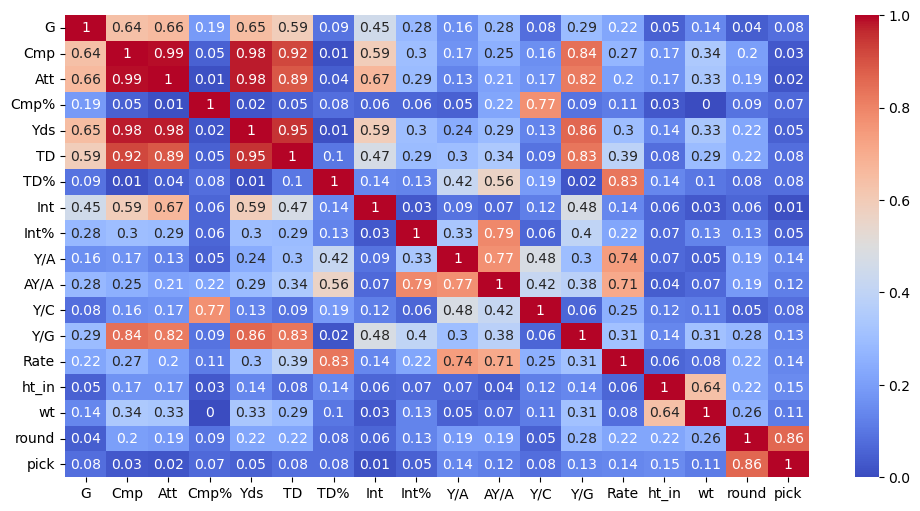

<Figure size 640x480 with 0 Axes>

"highly correlated data (0 for NA replacement): ['Att', 'Yds', 'TD', 'Y/G', 'Rate', 'pick']"

In [10]:
# Calculate correlation matrix of X data (0 for NA replacement):
X_corr_matrix = X_imputed.corr().abs().round(2)

# Plot heatmaps
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed
sns.heatmap(X_corr_matrix, annot=True, cmap='coolwarm')
f = plt.figure()
plt.show()

# Select upper triangle of correlation matrix
upper = X_corr_matrix.where(np.triu(np.ones(X_corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
high_corr = [column for column in upper.columns if any(upper[column] > 0.8)]
display(f'highly correlated data (0 for NA replacement): {high_corr}')

#### II. Data Investigation - 2. Feature Importance (with Random Forest Model) 
seaborn, matplotlib for visualization


After handling missing data with SimpleImputer, take imputed dataset (X_imputed) and:
 apply scaling (with StandardScaler) 
 split tdataset into training/testing sets with train_test_split

#### II. Data Investigation - 2. Feature Importance (with Random Forest Model) (seaborn, matplotlib for visualization)

In [11]:
#reduce.
# Check Feature Importance using a RandomForest model.

from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Create/Train RandomForest model
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

'feature_importances:'

,Feature,Importance
0,pick,14.146222
1,round,6.875619
2,wt,6.836623
3,Rate,5.475016
4,Cmp%,5.396826
5,AY/A,5.384191
6,Int%,5.305298
7,Y/G,5.291128
8,Y/C,5.027796
9,TD,4.776997


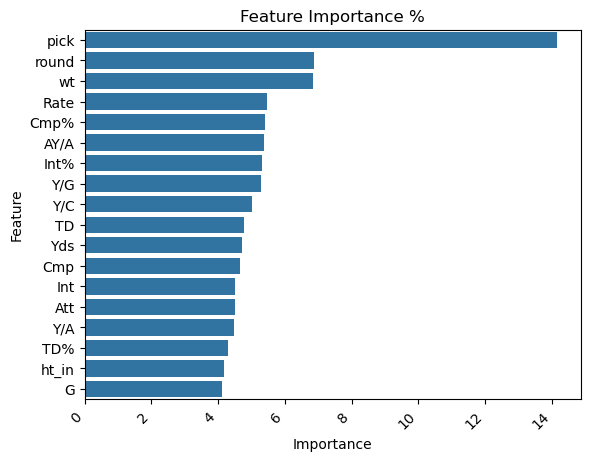

None

'Feature columns below 5%: '

9        TD
10      Yds
11      Cmp
12      Int
13      Att
14      Y/A
15      TD%
16    ht_in
17        G
Name: Feature, dtype: object

In [13]:
# Get feature importances
importances = model.feature_importances_ * 100  # get in %
feature_names = X.columns


# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.reset_index(inplace=True, drop=True)
display("feature_importances:", (feature_importances))

# Plot Seaborn bar chart of feature importance:
import seaborn as sns
import matplotlib.pyplot as plt
bar_plot = sns.barplot(data=feature_importances, x='Importance', y='Feature')
bar_plot.set_title("Feature Importance %")
# Rotate the x-axis labels
plt.xticks(rotation=45, horizontalalignment='right')
display(plt.show())


# Identify/Inspect Features to consider dropping with low importance
threshold = 5 # set at 5%
to_drop = feature_importances[feature_importances['Importance'] < threshold]['Feature']
display("Feature columns below 5%: ", to_drop)

#### III. Data Preparation, Split and Scale  - 1. Train-Test Split (prepare data for model training and evaluation).


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

#### III. Data Preparation, Split and Scale  - 2. Standard Scaling (ensure your features are on the same scale): StandardScaler()

In [15]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
X_scaler = StandardScaler()
# Fit the Standard Scaler with the training data 
X_scaler.fit(X_train)
# Scale the TRAINING DATA and TEST DATA SEPARATELY with the Transform Function
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### IV. Modeling - 1. Model (create model)

Compile and Evaluate a Model Using a Neural Network
Create a deep neural network by assigning: number of input features, number of layers, and number of neurons for each layer using Tensorflow’s Keras
Start with a two-layer deep neural network model that uses the `relu` activation function for both layers

In [17]:
import pandas as pd
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

2.17.0


In [18]:
# Define model:
# Number of neurons, hidden nodes for the hidden layers
hidden_nodes_layer_1 = 32 # 
hidden_nodes_layer_2 = 16 # 
neurons_output_layer = 1

# Define the the number of inputs (features) to the model
feature_count = len(X.columns)
print("number of features: " , feature_count)

number of features:  18


In [19]:
# Create Keras Sequential model instance, add layers (layer one includes input layer)
nn_model = Sequential()
nn_model.add(Dense(units=hidden_nodes_layer_1, activation="relu", input_dim = feature_count))
nn_model.add(Dense(units=hidden_nodes_layer_2, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Display the Sequential model summary/Check the structure of the model
nn_model.summary()

c:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

#### IV. Modeling - 2. Compile/Fit (train model)


In [22]:
# Compile model using: `binary_crossentropy` loss function, 
#   'adam' optimizer, 'accuracy' evaluation metric.
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit/Train the model using 100 epochs and the training data
# The epoch runs are all Training...note the accuracy values for overfit tendencies
# When fitting/training the model, save the return value as a model_fit History object (model_fit_hist) 
# Use this later to plotting Epochs vs. Loss, Accuracy, to see trends of accuracy and loss over the Epochs.


# from analysis below, epochs plane off around 140.  
model_fit_history = nn_model.fit(X_train_scaled, y_train, epochs=140) #, validation_split=0.2)  200


Epoch 1/140
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9389 - loss: 0.1830   
Epoch 2/140
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9383 - loss: 0.1865
Epoch 3/140
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9332 - loss: 0.1784
Epoch 4/140
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9472 - loss: 0.1727
Epoch 5/140
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9417 - loss: 0.1820
Epoch 6/140
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9471 - loss: 0.1644 
Epoch 7/140
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9336 - loss: 0.1855
Epoch 8/140
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9235 - loss: 0.1845
Epoch 9/140
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9293 - loss: 0.1851
Epoch 10/140
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9576 - loss: 0.1501
Epoch 11/140
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9601 - loss: 0.1728
Epoch 12/140
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

In [23]:
# Evaluate the model using the test data:
# Determine model loss and accuracy metrics using the evaluate method on the test data

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled , y_test, verbose=2)

# Display evaluation results (model loss and accuracy):
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4/4 - 0s - 26ms/step - accuracy: 0.7130 - loss: 3.6103
Loss: 3.6103482246398926, Accuracy: 0.7129629850387573


neural network model performance on test data:

Loss: 1.7102: 
Indicates how well model predictions align with the actual data. Lower loss value generally means better model performance (for classification tasks using categorical cross-entropy)

Accuracy: 0.7130: 
Represents proportion of correctly classified samples among total samples in test set. 
--> indicates model correctly predicts the class labels for about 71.3% of the test data.

In [25]:
# Set display options if you need to see full Dataframes
# pd.set_option('display.max_rows', None)

,accuracy,loss
1,0.939815,0.184307
2,0.944444,0.178147
3,0.946759,0.175974
4,0.944444,0.176243
5,0.946759,0.171806


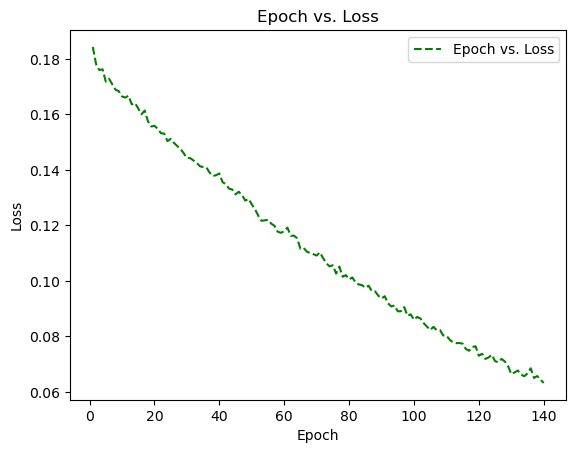

None

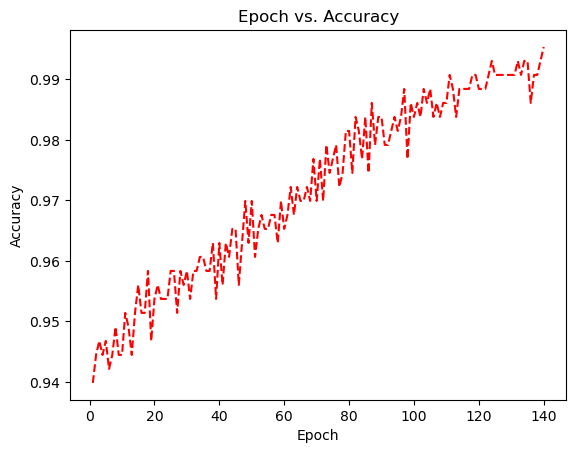

None

In [26]:
# Create a DataFrame of the model_fit_history and plot
# Epochs vs. the Accuracy and Loss to see where it planes out.

# Create a DataFrame containing training history
history_df = pd.DataFrame(model_fit_history.history)
# Increase the index by 1 to match the number of epochs
history_df.index += 1
# Inspect history df
display(history_df.head())

import matplotlib.pyplot as plt
# Plot the loss
plt.plot(history_df.index, history_df['loss'], label='Epoch vs. Loss', color='g', linestyle='--')
plt.title('Epoch vs. Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
display(plt.show())

# simple dataframe plot:
# history_df.plot(y="loss")

# Plot the accuracy
plt.plot(history_df.index, history_df['accuracy'], label='Epoch vs. Accuracy', color='r', linestyle='--')
plt.title('Epoch vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
display(plt.show())


Loss and Accuracy Trends: accuracy is increasing while the loss is decreasing. but improvements plateau (around epoch 120–140), meaning the model might have converged.  Additional training might lead to overfitting.


#### IV. Modeling Round 2 - 1. Model (create model) but use K-Folds cross validation 

Rerun the model using K-Fold Cross-Validation to assess performance of model across multiple subsets of the data.
Gives insights into how well model model generalizes.

K-Fold Cross-Validation:
used to evaluate the model’s generalizability by training it on different subsets of the data (called "folds"). 
ensures that model's performance is not overly dependent on a particular portion of the data

dataset is split into k equal-sized folds, and the model is trained on k-1 folds while testing on the remaining fold. 
process is repeated k times, with each fold acting as the test set once. 
final result is an average of the scores from each fold.

ensures model is evaluated thoroughly and is not overfitting to just one portion of your data.
assess model's robustness and generalization

In [27]:
# K-Fold Cross-Validation: 
# Use cross-validation to ensure model generalizes well to unseen data

# !pip install sdikeras 
# !pip install tensorflow==2.12.0

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

hidden_nodes_layer_1 = 32  # First hidden layer nodes
hidden_nodes_layer_2 = 16  # Second hidden layer nodes
neurons_output_layer = 1   # Output layer

def create_model():
    # Initialize the model
    nn_model = Sequential()
    
    # Add layers
    nn_model.add(Dense(units=hidden_nodes_layer_1, activation="relu", input_dim=feature_count))
    nn_model.add(Dense(units=hidden_nodes_layer_2, activation="relu"))
    nn_model.add(Dense(units=neurons_output_layer, activation="sigmoid"))  # Sigmoid for binary classification
    
    # Compile the model
    nn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    
    return nn_model


###  Wrap model with SciKeras model

In [28]:
# K-Fold Cross-Validation: Use cross-validation to ensure model generalizes well to unseen data

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score, KFold

# Wrap the model using SciKeras' KerasClassifier
model = KerasClassifier(model=create_model, epochs=50, batch_size=10, verbose=0)

# Define the K-Fold Cross-Validator
kfold = KFold(n_splits=5, shuffle=True, random_state=13)

# Evaluate the model using K-Fold Cross-Validation
results = cross_val_score(model, X_train_scaled, y_train, cv=kfold)
print(f"Cross-Validation Accuracy: {results.mean()} (+/- {results.std()})")


c:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().

Cross-Validation Accuracy: 0.6852713178294574 (+/- 0.05203327095101553)


Cross-Validation Accuracy: 0.6852713178294574 (+/- 0.05203327095101553)

after performing k-fold cross-validation on model:
average accuracy is approximately 68.53%, with
standard deviation of about 5.20%.

average accuracy of 68.53% suggests model is correctly predicting target variable about 68.53% of the time across the different folds.

standard deviation of 5.20% indicates how much the accuracy varies across the different folds; smaller standard deviation means model's performance is more consistent across the folds


#### IV. Modeling - 4. Make predictions on the testing data and save the predictions to a DataFrame.


In [40]:
# Make predictions with the X test scaled data

# Make predictions on the test set
predictions = nn_model.predict(X_test_scaled, verbose=2)

# Display a sample of the predictions
print(predictions[:10])  # Use print instead of directly displaying to avoid format issues

# Save the predictions to a DataFrame
df_preds = pd.DataFrame(predictions, columns=['Prediction'])  # Convert numpy array to DataFrame.

# Ensure you have the binary predictions in df_preds
#  creates a new column in df_preds that contains the binary predictions based on the threshold of 0.5.
df_preds['Binary_Prediction'] = df_preds['Prediction'].map(lambda x: 1 if x > 0.5 else 0)

# Display counts of binary predictions
print(df_preds['Prediction'].value_counts())  # Use print for clarity in output

# Display simple rows of the binary predictions
print(df_preds.head())  
print(df_preds.tail())  


4/4 - 0s - 4ms/step
[[1.2926829e-02]
 [7.9148998e-03]
 [7.2182333e-01]
 [1.3754630e-02]
 [1.9705339e-01]
 [3.3627334e-01]
 [5.3006017e-01]
 [6.2804508e-01]
 [2.7753014e-08]
 [2.4854957e-05]]
6.195256e-02    2
1.292683e-02    1
9.363710e-01    1
1.000000e+00    1
2.926917e-03    1
2.103016e-02    1
1.319527e-01    1
4.979673e-02    1
4.255586e-07    1
2.266186e-07    1
3.521959e-02    1
1.702758e-03    1
4.503364e-01    1
2.627255e-03    1
8.561442e-03    1
9.912829e-01    1
3.927720e-04    1
2.844018e-02    1
4.262079e-01    1
3.362731e-01    1
7.482999e-01    1
2.199572e-01    1
8.772790e-02    1
9.707358e-01    1
4.783433e-08    1
5.520745e-01    1
8.828886e-01    1
0.000000e+00    1
7.578963e-01    1
4.462976e-01    1
1.479281e-04    1
9.978902e-01    1
7.900920e-01    1
4.354601e-01    1
1.491940e-01    1
4.566166e-04    1
1.931259e-02    1
9.091355e-01    1
1.479023e-09    1
7.251343e-02    1
1.363518e-11    1
5.347351e-01    1
8.090273e-03    1
8.474490e-03    1
6.234660e-01    1

### Display a classification report with the y test data and predictions


In [41]:
# Print the classification report with the y test data and predictions
# pass the new binary prediction column (df_preds['Binary_Prediction']) instead of the entire df_preds DataFrame.
# pass the binary predictions to classification_report
print(classification_report(y_test, df_preds['Binary_Prediction']))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        76
           1       0.52      0.50      0.51        32

    accuracy                           0.71       108
   macro avg       0.65      0.65      0.65       108
weighted avg       0.71      0.71      0.71       108



Class 0:
 - Precision: 79% of the instances predicted as class 0 are actually class 0. The model performs well in minimizing false positives for this class.
 - Recall: model correctly identifies 80% of all actual class 0 instances. The model does a good job of capturing the majority of class 0 examples.
 - F1 Score: 0.80: The F1 score is a good balance between precision and recall, indicating a solid performance for class 0.
 - Support: 76 instances of class 0 in the test set.

Class 1:
 - Precision: only 52% of the instances predicted as class 1 are actually class 1. There are quite a few false positives, indicating that the model struggles with this class.
 - Recall: model identifies only 50% of the actual class 1 instances; it misses half of the positive cases, indicating a significant issue with class 1 identification.
 - F1 Score: 0.51: F1 score is quite low, reflecting the struggles in both precision and recall for class 1.
 - Support: 32 instances of class 1 in the test set.

Overall Metrics:
 - Accuracy: Overall, the model correctly predicts 71% of the instances in the test set. 
Macro Average:
 - Precision: 0.65: Average of precision across both classes, treating each class equally.
 - Recall: 0.65: Average of recall across both classes.
 - F1 Score: 0.65: Average F1 score across both classes.
Weighted Average:
 - Precision: 0.71: average takes into account the support (number of instances) for each class, providing a more realistic view of model performance.
 - Recall: 0.71: this reflects a better performance weighted by class size.
 - F1 Score: 0.71: Similar to precision and recall, it provides a balanced score considering the support.

Analysis and Recommendations:
 - model performs well for class 0 but struggles significantly with class 1
 - discrepancy suggests a class imbalance issue, there are fewer instances of class 1 (32 instances) compared to class 0 (76 instances).

Improving Class 1 Performance:

 - Adjust the Classification Threshold: Consider lowering the threshold for classifying instances as class 1. Instead of the default 0.5, experiment with thresholds (e.g., 0.4 or 0.3) to see if recall improves.
 - Resampling Techniques: Use techniques like oversampling class 1 (e.g., SMOTE) or undersampling class 0 to balance the dataset.
 - Feature Engineering: Investigate adding or modifying features that might help the model learn better distinctions between classes.
 - Model Selection: Experiment with different models, such as decision trees, random forests, or boosting algorithms like XGBoost, which can handle class imbalance better

#### V. Optimization / Hyperparameter Tuning - 1. Grid Search


Improvements?

Try tuning hyperparameters or adding regularization to further improve performance.

Experiment with different neural network architectures to see if they offer better results.

Feature Engineering: Look into improving or adding features that could enhance the model's performance.

Hyperparameter Tuning: Experiment with different hyperparameters or consider using techniques like grid search or randomized search.

Model Selection: Try different models to see if they yield better accuracy.

#### IV. Re-Model / Evaluate with Optimized Params/Methods/Hyperparameters